# Procesado Inicial

## Limpieza y procesado

Como este apartado se realizo en la primera entrega "MD005_DidacPiferrerIglesias_Agrupacion.ipynb" se colocará una celda completa que realice todas las limpieza y operaciones.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

C:\Users\Didac\AppData\Local\Temp\ipykernel_24320\1932699180.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

df = pd.read_csv("global-economy-indicators/Global Economy Indicators.csv")
#df = pd.read_csv("sample_data/Global Economy Indicators.csv")


df.columns=df.columns.str.strip()

#Vamos a crear un diccionario que nos asocie los nombre originales con los nuevos nombres abreviados
data_names = {}
for col in df.columns:
    primeras_letras = []
    for palabra in col.split():
        if palabra[0] == "(": #Aqui podemos añadir más caracteres que queramos para nuestro diccionario
            break
        else:
            if len(col.split()) > 1:
                primeras_letras.append(palabra[0])
            else:
                primeras_letras.append(palabra)

    key = ''.join(primeras_letras)
    data_names[key] = col
if len(set(data_names)) == len(data_names):
    print("Ready to create a dictionary:")
    print(data_names)
else:
    pass
    #Aquí deberíamos, en caso de que fuera necesario, separar los elementos que son iguales, y añadirles distintos valores hasta hacerlos únicos.

#definimos una función que nos permita obtener el valor del diccionario a traves del valor del diccionario
def get_key_from_value(diccionario,value):
    for k,v in diccionario.items():
        if v == value:
            return k
    return "None" #si el valor no se encuentra

#Renombramos todas las cabeceras de las columnas con los nuevos nombres
for col in df.columns:
    new_name = get_key_from_value(data_names,col)
    df.rename(columns = {col: new_name},inplace=True)

if not "None" in df.columns: print("Rename Succesfull")

#Tenemos espacios extras, por lo tanto tenemos que limpiar también estos datos
df['Country']=df['Country'].str.strip()
df['Currency']=df['Currency'].str.strip()

#Prevenir malos formatos en los numeros
for col in df.select_dtypes(['float64']):
    df[col]=pd.to_numeric(df[col])
df


Ready to create a dictionary:
{'CountryID': 'CountryID', 'Country': 'Country', 'Year': 'Year', 'Aer': 'AMA exchange rate', 'Iber': 'IMF based exchange rate', 'Population': 'Population', 'Currency': 'Currency', 'PcG': 'Per capita GNI', 'Ahff': 'Agriculture, hunting, forestry, fishing (ISIC A-B)', 'Cii': 'Changes in inventories', 'C': 'Construction (ISIC F)', 'Eogas': 'Exports of goods and services', 'Fce': 'Final consumption expenditure', 'Ggfce': 'General government final consumption expenditure', 'Gcf': 'Gross capital formation', 'Gfcf': 'Gross fixed capital formation (including Acquisitions less disposals of valuables)', 'Hce': 'Household consumption expenditure (including Non-profit institutions serving households)', 'Iogas': 'Imports of goods and services', 'M': 'Manufacturing (ISIC D)', 'MMU': 'Mining, Manufacturing, Utilities (ISIC C-E)', 'OA': 'Other Activities (ISIC J-P)', 'TVA': 'Total Value Added', 'Tsac': 'Transport, storage and communication (ISIC I)', 'Wrtrah': 'Wholesale,

,CountryID,Country,Year,Aer,Iber,Population,Currency,PcG,Ahff,Cii,...,Hce,Iogas,M,MMU,OA,TVA,Tsac,Wrtrah,GNIiU,GDP
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


In [57]:
df.isna().sum()

CountryID        0
Country          0
Year             0
Aer              0
Iber             0
Population       0
Currency         0
PcG              0
Ahff           121
Cii           1841
C                0
Eogas           21
Fce              0
Ggfce           52
Gcf             52
Gfcf            52
Hce             52
Iogas           42
M               43
MMU              0
OA               0
TVA              0
Tsac            49
Wrtrah          49
GNIiU            0
GDP              0
dtype: int64

# Algoritmos

## Parametrización de los datos y selección del subset de datos

In [61]:
#Como se han tenido que probar diferentes sets de datos, se ha creado esta celda para ir variando desde que año queríamos los datos
#y cuantos países queríamos contemplar como potencia mundial.

year = 2018 # 2000 para adelante
num_countries = 30 # 10 paises considerados potencia mundial

In [62]:
df_f = df[df['Year'] > year]

#wsc (without some countries)
dicc_pais = dict(zip(df_f['CountryID'], df_f['Country']))
print(dicc_pais)
countries_to_delete = ['China, Macao SAR','Monaco','Sint Maarten (Dutch part)','D.P.R. of Korea','Kiribati']

#también de igual forma que en la anterior entrega una vez creado nuestro diccionario, podemos eliminar las variables categoricas Currency y Country
df_wsc = df_f[~df_f['Country'].isin(countries_to_delete)].drop(['Cii','Country','Currency'], axis = 1)

def wp_calculation(country):
    if country in top10:
        return 1 #True
    else:
        return 0 #False

#Seleccionamos las 10 potencias en los últimos 6 años del dataset
media_GDP = df_wsc.groupby('CountryID')['GDP'].mean()
top10 = media_GDP.nlargest(num_countries)
print(top10)
df_wsc['WP'] = df_wsc['CountryID'].apply(wp_calculation)

#creamos las llaves disponibles que tenemos que no forman parte del top10
random.seed(42)
key_availables = [key for key in dicc_pais.keys() if key not in top10]

non_wp = random.sample(key_availables,num_countries)

#a continuación vamos a extrer los countryID del top10 y los vamos a juntar con los otros seleccionados

wp_keys = [key for key,val in top10.items()]

total_wp_nonwp = non_wp + wp_keys
total_wp_nonwp

df_fy_final = df_wsc[df_wsc['CountryID'].isin(total_wp_nonwp)]

#antes de realizar nada, eliminamos nuestra variable CountryID que todo y que sea numerica es un ID asignado 
#por el dataset que solo añade ruido al dataset.
df_fy_final= df_fy_final.drop(['CountryID'],axis=1)

{4: 'Afghanistan', 8: 'Albania', 12: 'Algeria', 20: 'Andorra', 24: 'Angola', 28: 'Antigua and Barbuda', 31: 'Azerbaijan', 32: 'Argentina', 36: 'Australia', 40: 'Austria', 44: 'Bahamas', 48: 'Bahrain', 50: 'Bangladesh', 51: 'Armenia', 52: 'Barbados', 56: 'Belgium', 60: 'Bermuda', 64: 'Bhutan', 68: 'Bolivia (Plurinational State of)', 70: 'Bosnia and Herzegovina', 72: 'Botswana', 76: 'Brazil', 84: 'Belize', 90: 'Solomon Islands', 92: 'British Virgin Islands', 96: 'Brunei Darussalam', 100: 'Bulgaria', 104: 'Myanmar', 108: 'Burundi', 112: 'Belarus', 116: 'Cambodia', 120: 'Cameroon', 124: 'Canada', 132: 'Cabo Verde', 136: 'Cayman Islands', 140: 'Central African Republic', 144: 'Sri Lanka', 148: 'Chad', 152: 'Chile', 156: 'China', 170: 'Colombia', 174: 'Comoros', 178: 'Congo', 180: 'D.R. of the Congo', 184: 'Cook Islands', 188: 'Costa Rica', 191: 'Croatia', 192: 'Cuba', 196: 'Cyprus', 203: 'Czechia', 204: 'Benin', 208: 'Denmark', 212: 'Dominica', 214: 'Dominican Republic', 218: 'Ecuador', 222

## Regresión Exponencial decreciente

Vistos los datos que se han usado para las anteriores entregas, en esta se ha decido continuar con las mismas variables que en la anterior entrega funcionaron ['Aer', 'Ahff']. Como se verá en el plot de abajo, la función no lineal parece seguir una exponencial decreciente, así que se ha intentado aplicar a través de la función curve_fit y especificandole que se trata de una función exponencial decreciente modelar este comportamiento.

In [52]:
mydf = df_fy_final
#Escogemos nuestras variables
twoVar = ['Ahff', 'Aer', 'WP']
mydf = mydf[twoVar]

#verificamos que con los parametros escogidos no encontramos nulos
mydf.isna().sum()

Ahff    0
Aer     0
WP      0
dtype: int64

c:\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Figure size 500x2000 with 0 Axes>

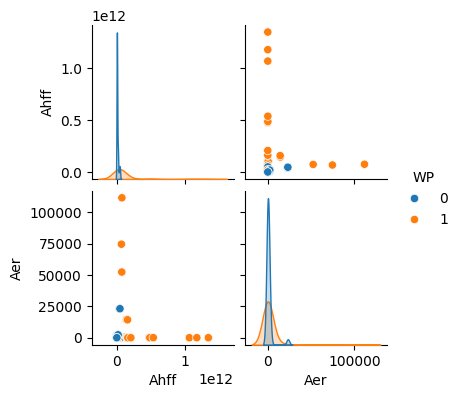

In [58]:
#Hacemos un primer plot para ver que forma tienen nuestros datos
plt.figure(figsize = (5, 20))
sns.pairplot(mydf, height=2, hue = 'WP',palette = "tab10")
plt.show()

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
data = mydf.iloc[:, :-1] #cogemos todas las columnas, excepto la última
data

#Estandarizamos nuestros datos, ya que sino los valores quedán muy desproporcionados
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)
data_scaled.shape

df_scaled = pd.DataFrame(data_scaled, columns=[f'{i}' for i in data.columns])

In [59]:
#Ya que estaremos pasando nuestros datos a una función no lineal continua, debemos de asegurarnos que no tenemos puntos repetidos en el domino de las X
# así que eliminamos los duplicados 
duplicados = df_scaled.duplicated(subset=['Aer'], keep=False)
df_filtrado = df_scaled[~duplicados]

x = df_filtrado.values[:,0]
y = df_filtrado.values[:,1]

#verificamos que tenemos un grupo de datos representativo
df_filtrado.values.shape


(112, 2)

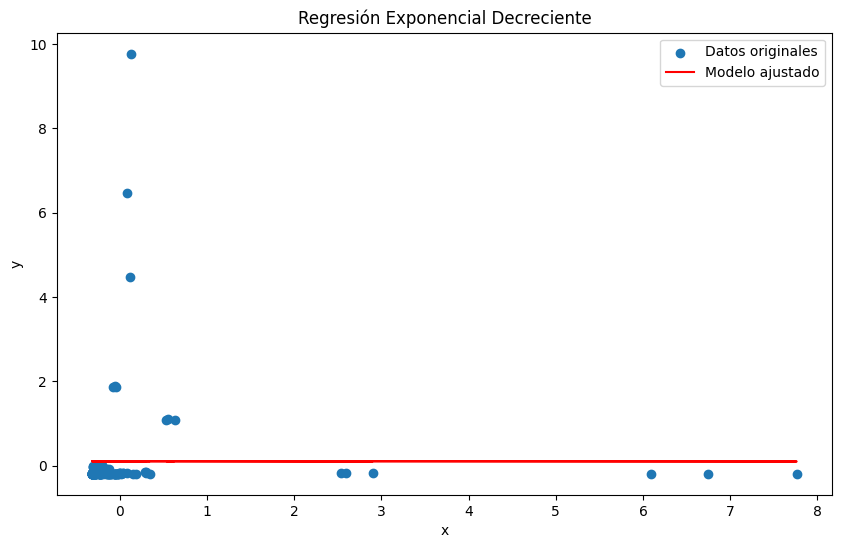

(8.668776098860002, 0.00013643857668368828, -8.561534475003892)

In [60]:
from scipy.optimize import curve_fit

#Definimos la función del modelo exponencial decreciente
def exp_decreasing(x, a, b, c):
    return a * np.exp(-b * x) + c

#Ajustamos el modelo exponencial a los datos
params, covariance = curve_fit(exp_decreasing, x, y)

#Extraemos los parámetros ajustados
a_fitted, b_fitted, c_fitted = params

#Generamos predicciones del modelo ajustado
y_fitted = exp_decreasing(x, a_fitted, b_fitted, c_fitted)

#Visualizar los datos y el modelo ajustado
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Datos originales')
plt.plot(x, y_fitted, color='red', label='Modelo ajustado')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Exponencial Decreciente')
plt.legend()
plt.show()

# Mostrar los parámetros ajustados
a_fitted, b_fitted, c_fitted
